In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

GENERAL CHECK FOR DATASET

In [2]:
df=pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
print(df.info())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

WE HAVE OBJECt COLUMNS AND THEY ARE WRONG NAMED

LET ADJUST COLUMN NAMES

In [4]:
col_names=["Buy Price","Maintain Cost","Doors","Persons","Luggage Size","Safety","Class"]
df.columns=col_names

df.head()

,Buy Price,Maintain Cost,Doors,Persons,Luggage Size,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


LOOKING FOR DATASET FEATURES VALUE DISTRUBITION

In [5]:
for i in df.columns:
    print(df[i].value_counts(),"\n")

Buy Price
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 

Maintain Cost
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 

Doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64 

Persons
4       576
more    576
2       575
Name: count, dtype: int64 

Luggage Size
med      576
big      576
small    575
Name: count, dtype: int64 

Safety
med     576
high    576
low     575
Name: count, dtype: int64 

Class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64 



GENERALLY BALANCED

WE'LL CHECK UNIQUE VALUES FOR FEATURE ENGINEERING


In [6]:
for i in df.columns:
    print(f"{i}: ",df[i].unique(),"\n")

Buy Price:  ['vhigh' 'high' 'med' 'low'] 

Maintain Cost:  ['vhigh' 'high' 'med' 'low'] 

Doors:  ['2' '3' '4' '5more'] 

Persons:  ['2' '4' 'more'] 

Luggage Size:  ['small' 'med' 'big'] 

Safety:  ['med' 'high' 'low'] 

Class:  ['unacc' 'acc' 'vgood' 'good'] 



LET CHANGE STRING VALUES TO INTEGER

In [7]:
df['Doors']=df['Doors'].replace('5more','5')
df['Persons']=df['Persons'].replace('more','5')

In [8]:
df['Doors']=df['Doors'].astype(int)
df['Persons']=df['Persons'].astype(int)

In [9]:
df['Class'].value_counts()

Class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

NOT TOTALLY BALANCED

CHECK FOR PAIR RELATIONS

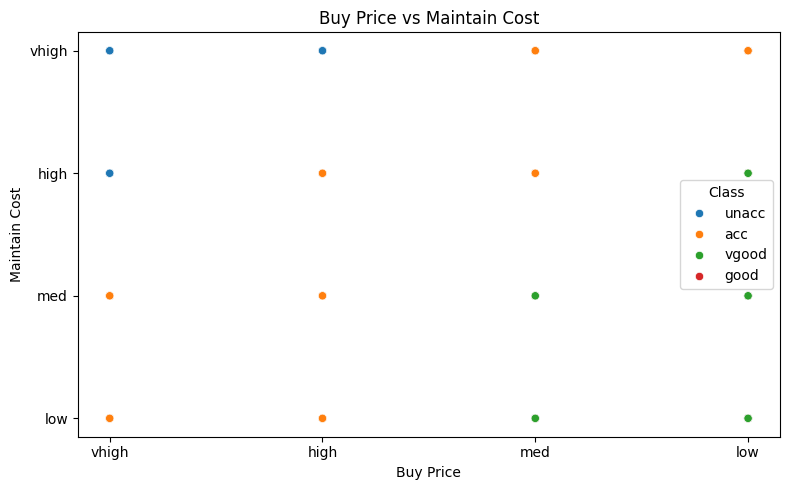

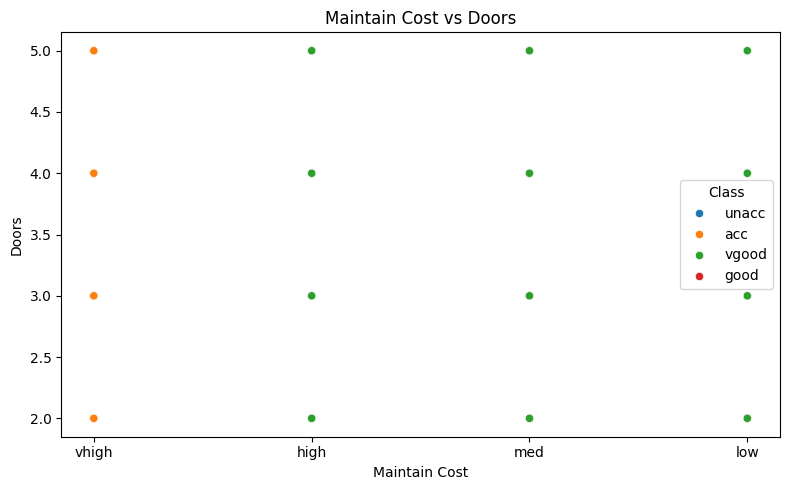

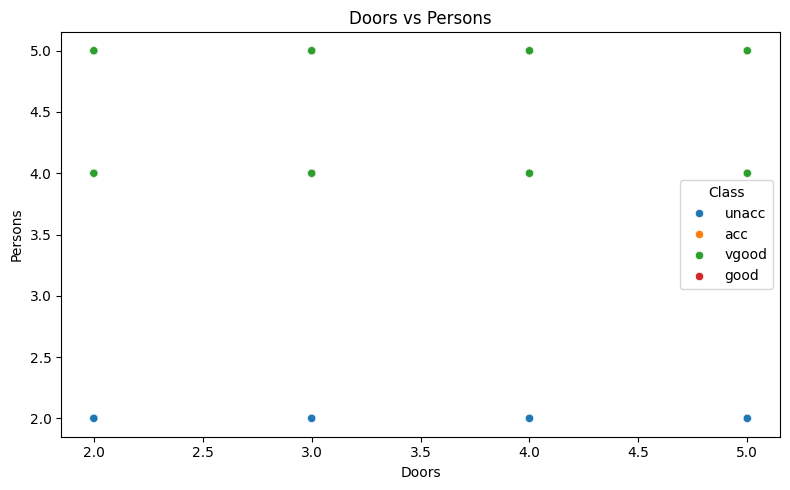

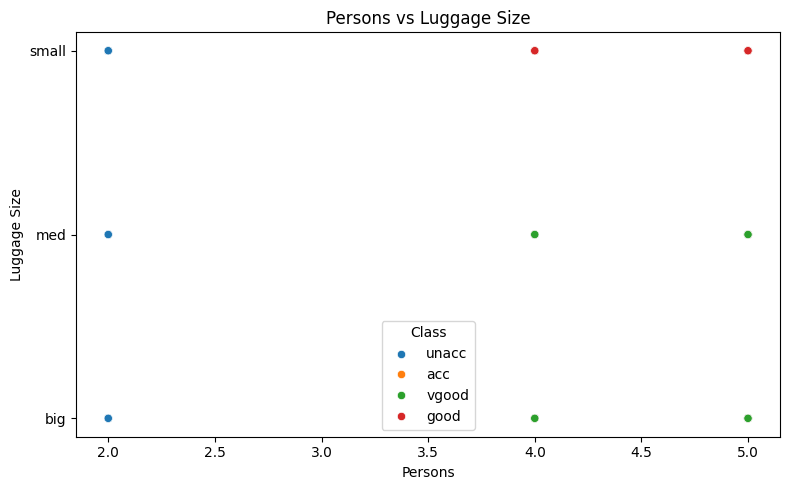

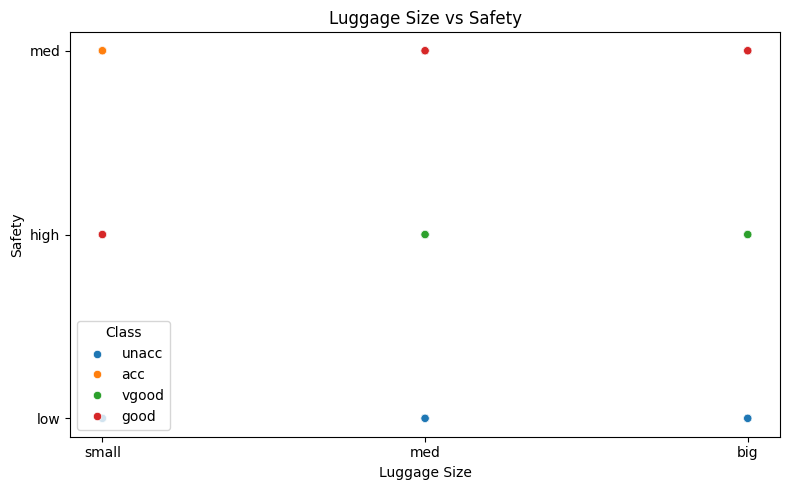

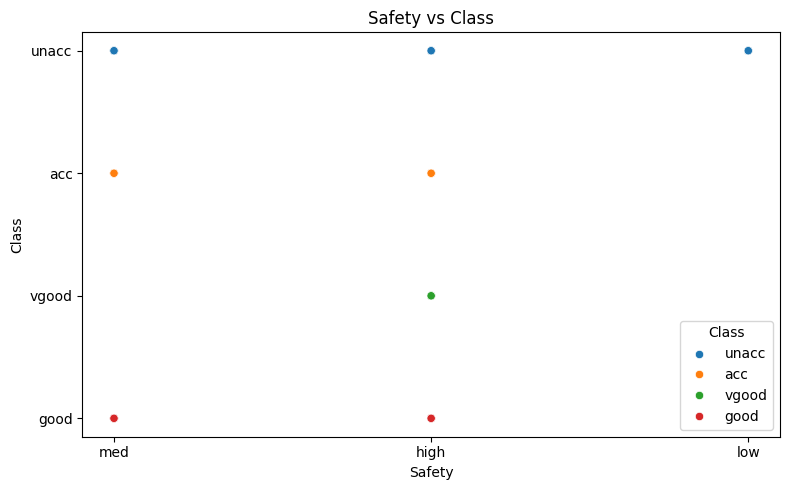

In [10]:
for i in range(len(df.columns)-1):
    x_col=df.columns[i]
    y_col=df.columns[i+1]
    
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[x_col], y=df[y_col],hue=df['Class'])
    plt.title(f"{x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()

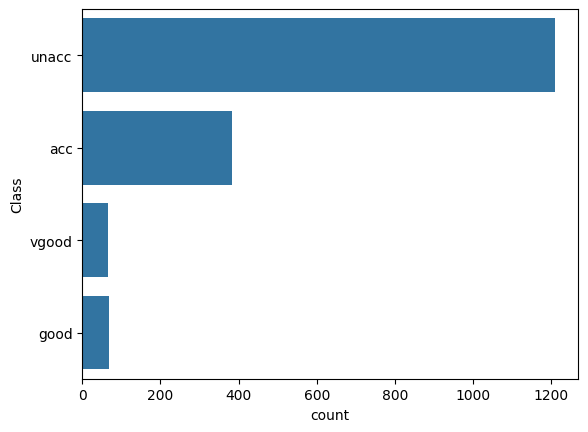

In [11]:
sns.countplot(y=df['Class'])
plt.show()

LET TRAIN OUR MODEL AND INVESTIGATE THE BEST MODEL

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

X WILL BE OUR FEATURES AND Y WILL BE CLASS

WE GAVE A RANDOM STATE SO IF WE WANT TO USE THIS DATASET AGAIN WE CAN GET CONSISTENT DISTRUBITION

In [13]:
X=df.drop('Class',axis=1)
y=df['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21)

WE NEED AN ORDINAL ENCODING TO EXECUTE OUR FEATURES

IF WE PUT THE LOWEST AT FIRST WE CAN GET 0 VALUE FOR IT

WE CREATED A PIPELINE and GAVE REMAINDER "passthrough"

In [14]:
cols_to_transfer=["Buy Price","Maintain Cost","Luggage Size","Safety"]
categories=[
   ['vhigh','high','med', 'low'][::-1], #Buy price
   ['vhigh','high','med', 'low'][::-1], #Maintain 
   ['big','med' ,'small'][::-1], #Luggage
   ['high', 'med', 'low'][::-1] #Safety
]
ord=OrdinalEncoder(categories=categories)

preprocessing=ColumnTransformer(transformers=[
   ("Transform",ord,cols_to_transfer)  
],remainder="passthrough")

X_train=preprocessing.fit_transform(X_train)
X_test=preprocessing.transform(X_test)

OUR FIRST MODEL IS LOGISTIC REGRESSION

WE'LL TRY BEFORE HYPERPARAMETER TUNING

In [15]:
log=LogisticRegression()
log.fit(X_train,y_train)

y_pred=log.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)
rep=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\n","Matrix: \n",conf,"\n","Report: \n",rep)

Accuracy:  0.8564814814814815 
 Matrix: 
 [[ 61   3  31   1]
 [  6   6   0   1]
 [ 12   5 290   1]
 [  2   0   0  13]] 
 Report: 
               precision    recall  f1-score   support

         acc       0.75      0.64      0.69        96
        good       0.43      0.46      0.44        13
       unacc       0.90      0.94      0.92       308
       vgood       0.81      0.87      0.84        15

    accuracy                           0.86       432
   macro avg       0.72      0.73      0.72       432
weighted avg       0.85      0.86      0.85       432



WE GOT ACCEPTABLE SCORE BUT WE SHOULD BE ENSURE THAT WE CAN PROVIDE HIGHER SCORE THAN THIS


LET TRY WITH TUNING

In [16]:
weights = [1, 2, 5, 10]
class_labels = ['acc', 'good', 'unacc', 'vgood']
class_weight = [
    {class_labels[0]: w1, class_labels[1]: w2, class_labels[2]: w3, class_labels[3]: w4}
    for w1 in weights
    for w2 in weights
    for w3 in weights
    for w4 in weights]
c_values = [0.01, 0.1, 1, 10]
l1_ratio = [0.1, 0.5, 1.0]

cv = StratifiedKFold()
log = LogisticRegression(max_iter=1000)

param_grid = [
    {
        'penalty': ['l2'],
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'C': c_values,
        'class_weight': class_weight
    },
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'C': c_values,
        'class_weight': class_weight
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'C': c_values,
        'class_weight': class_weight,
        'l1_ratio': l1_ratio
    }
]


In [17]:
ran = RandomizedSearchCV(
    estimator=log,
    param_distributions=param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

In [18]:
ran.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
                   param_distributions=[{'C': [0.01, 0.1, 1, 10],
                                         'class_weight': [{'acc': 1, 'good': 1,
                                                           'unacc': 1,
                                                           'vgood': 1},
                                                          {'acc': 1, 'good': 1,
                                                           'unacc': 1,
                                                           'vgood': 2},
                                                          {'acc': 1, 'good': 1,
                                                           'unacc': 1,
                                                           'vgood': 5},
                                                          {'acc': 1, 'good': 1,
                                                           'unacc': 1,
                                                           'vgood': 10}...
                                                           'vgood': 10},
                                                          {'acc': 1, 'good': 2,
                                                           'unacc': 5,
                                                           'vgood': 1},
                                                          {'acc': 1, 'good': 2,
                                                           'unacc': 5,
                                                           'vgood': 2},
                                                          {'acc': 1, 'good': 2,
                                                           'unacc': 5,
                                                           'vgood': 5},
                                                          {'acc': 1, 'good': 2,
                                                           'unacc': 5,
                                                           'vgood': 10},
                                                          {'acc': 1, 'good': 2,
                                                           'unacc': 10,
                                                           'vgood': 1},
                                                          {'acc': 1, 'good': 2,
                                                           'unacc': 10,
                                                           'vgood': 2}, ...],
                                         'l1_ratio': [0.1, 0.5, 1.0],
                                         'penalty': ['elasticnet'],
                                         'solver': ['saga']}],
                   scoring='accuracy', verbose=1)

In [19]:
ran.best_params_

{'solver': 'sag',
 'penalty': 'l2',
 'class_weight': {'acc': 2, 'good': 5, 'unacc': 2, 'vgood': 2},
 'C': 0.1}

In [20]:
y_pred=ran.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)
rep=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\n","Matrix: \n",conf,"\n","Report: \n",rep)

Accuracy:  0.8472222222222222 
 Matrix: 
 [[ 60   4  31   1]
 [  1  11   1   0]
 [ 10  11 287   0]
 [  2   5   0   8]] 
 Report: 
               precision    recall  f1-score   support

         acc       0.82      0.62      0.71        96
        good       0.35      0.85      0.50        13
       unacc       0.90      0.93      0.92       308
       vgood       0.89      0.53      0.67        15

    accuracy                           0.85       432
   macro avg       0.74      0.73      0.70       432
weighted avg       0.87      0.85      0.85       432



SCORE DECREASED. IT SHOW US MODEL SHOULD BE DEFAULT

LET TRY WITH NAIVE BAYES 

In [21]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [22]:
multi=MultinomialNB()
multi.fit(X_train,y_train)

y_pred=multi.predict(X_test)
    
accuracy=accuracy_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)
rep=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\n","Matrix: \n",conf,"\n","Report: \n",rep)

Accuracy:  0.7129629629629629 
 Matrix: 
 [[  0   1  95   0]
 [  6   2   5   0]
 [  2   0 306   0]
 [  7   3   5   0]] 
 Report: 
               precision    recall  f1-score   support

         acc       0.00      0.00      0.00        96
        good       0.33      0.15      0.21        13
       unacc       0.74      0.99      0.85       308
       vgood       0.00      0.00      0.00        15

    accuracy                           0.71       432
   macro avg       0.27      0.29      0.27       432
weighted avg       0.54      0.71      0.61       432



In [23]:
gauss=GaussianNB()
gauss.fit(X_train,y_train)

y_pred=gauss.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)
rep=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\n","Matrix: \n",conf,"\n","Report: \n",rep)

Accuracy:  0.7731481481481481 
 Matrix: 
 [[ 29   4  24  39]
 [  3   3   1   6]
 [ 16   1 287   4]
 [  0   0   0  15]] 
 Report: 
               precision    recall  f1-score   support

         acc       0.60      0.30      0.40        96
        good       0.38      0.23      0.29        13
       unacc       0.92      0.93      0.93       308
       vgood       0.23      1.00      0.38        15

    accuracy                           0.77       432
   macro avg       0.53      0.62      0.50       432
weighted avg       0.81      0.77      0.77       432



BAD SCORES ACCORDING TO LOGISTIC REGRESSION

LET TRY WITH KNN

WE'LL USE KNeighborsClassifier WITHOUT TUNING AT FIRST

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)
rep=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\n","Matrix: \n",conf,"\n","Report: \n",rep)



Accuracy:  0.9606481481481481 
 Matrix: 
 [[ 91   1   4   0]
 [  5   8   0   0]
 [  4   0 304   0]
 [  1   2   0  12]] 
 Report: 
               precision    recall  f1-score   support

         acc       0.90      0.95      0.92        96
        good       0.73      0.62      0.67        13
       unacc       0.99      0.99      0.99       308
       vgood       1.00      0.80      0.89        15

    accuracy                           0.96       432
   macro avg       0.90      0.84      0.87       432
weighted avg       0.96      0.96      0.96       432



VERY GOOD ACCURACY

NOW TRY WITH TUNING

In [26]:
cv=StratifiedKFold()
params={
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
    "weights":["uniform","distance"],
    "algorithm":["auto","ball_tree","kd_tree","brute"]
}

grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,n_jobs=-1,cv=cv,scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [27]:
y_pred=grid.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)
rep=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\n","Matrix: \n",conf,"\n","Report: \n",rep)

Accuracy:  0.9652777777777778 
 Matrix: 
 [[ 93   1   2   0]
 [  4   8   0   1]
 [  5   0 303   0]
 [  2   0   0  13]] 
 Report: 
               precision    recall  f1-score   support

         acc       0.89      0.97      0.93        96
        good       0.89      0.62      0.73        13
       unacc       0.99      0.98      0.99       308
       vgood       0.93      0.87      0.90        15

    accuracy                           0.97       432
   macro avg       0.93      0.86      0.89       432
weighted avg       0.97      0.97      0.96       432



TUNING HAS INCREASED ACCURACY SCORE 

In [28]:
grid.best_params_

{'algorithm': 'brute', 'n_neighbors': 8, 'weights': 'distance'}

LET TRY WITH DECISION TREES 

WE USE DecisionTreeClassifier WITHOUT TUNING AT FIRST

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)
rep=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\n","Matrix: \n",conf,"\n","Report: \n",rep)

Accuracy:  0.9722222222222222 
 Matrix: 
 [[ 92   0   4   0]
 [  4   9   0   0]
 [  3   0 305   0]
 [  1   0   0  14]] 
 Report: 
               precision    recall  f1-score   support

         acc       0.92      0.96      0.94        96
        good       1.00      0.69      0.82        13
       unacc       0.99      0.99      0.99       308
       vgood       1.00      0.93      0.97        15

    accuracy                           0.97       432
   macro avg       0.98      0.89      0.93       432
weighted avg       0.97      0.97      0.97       432



WE HAVE GOT THE BEST SCORE EVER


BUT WHAT IF OUR TRAIN MODEL IS MAKING OVERFITTING

LET WE CHECK

In [31]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

score_train = accuracy_score(y_train, y_train_pred)
score_test = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", score_train)
print("Test Accuracy:", score_test)

Train Accuracy: 1.0
Test Accuracy: 0.9722222222222222


THERE IS NO OVERFITTING

NOW LET CHECK WITH TUNING


In [32]:
params={
    'criterion':['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_features': ['log2','sqrt','auto'],
    
}

In [33]:
grid=GridSearchCV(estimator=tree,
     param_grid=params,
         cv=5,
            scoring='accuracy',
                  verbose=1,
                     n_jobs=-1)

In [34]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [35]:
grid.best_params_

{'criterion': 'log_loss', 'max_features': 'sqrt', 'splitter': 'best'}

In [36]:
y_pred=grid.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)
rep=classification_report(y_test,y_pred)

print("Accuracy: ",accuracy,"\n","Matrix: \n",conf,"\n","Report: \n",rep)

Accuracy:  0.9398148148148148 
 Matrix: 
 [[ 87   2   7   0]
 [  4   9   0   0]
 [  9   3 296   0]
 [  1   0   0  14]] 
 Report: 
               precision    recall  f1-score   support

         acc       0.86      0.91      0.88        96
        good       0.64      0.69      0.67        13
       unacc       0.98      0.96      0.97       308
       vgood       1.00      0.93      0.97        15

    accuracy                           0.94       432
   macro avg       0.87      0.87      0.87       432
weighted avg       0.94      0.94      0.94       432



TUNING IS NOT GOOD FOR THIS MODEL

LET LOOK AT OUR TREE GRAPH

In [37]:
from sklearn.tree import plot_tree

In [38]:
df.columns

Index(['Buy Price', 'Maintain Cost', 'Doors', 'Persons', 'Luggage Size',
       'Safety', 'Class'],
      dtype='object')

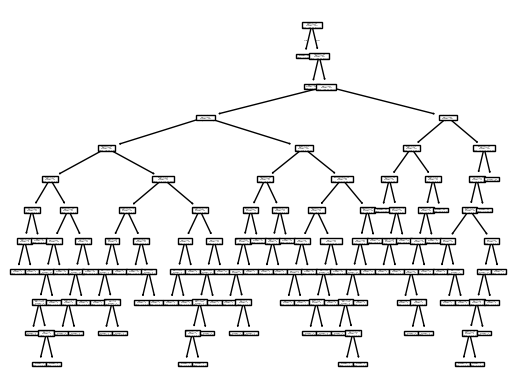

In [39]:
plot_tree(decision_tree=tree.fit(X_train,y_train),feature_names=['Buy Price','Maintain Cost','Doors','Persons','Luggage Size','Safety'])
plt.show()

WE NEED TO PRUNING

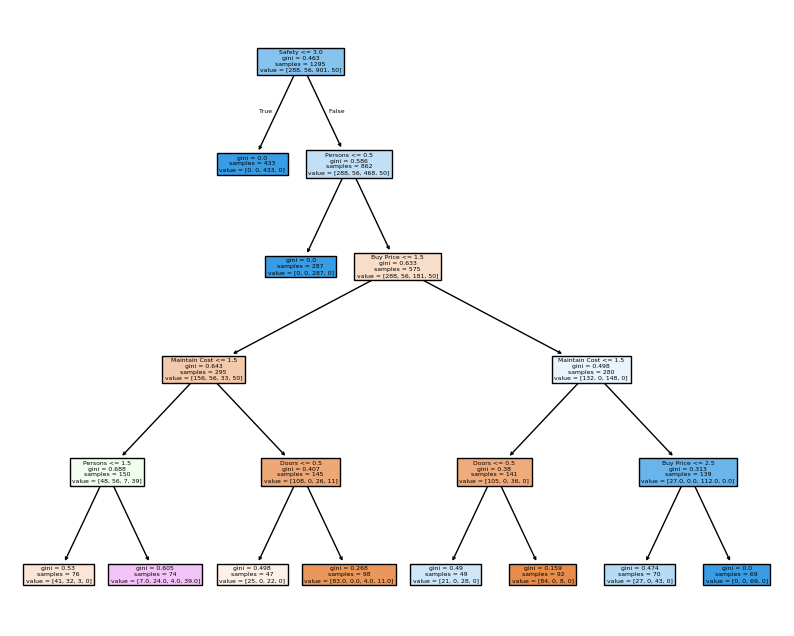

In [45]:
tree=DecisionTreeClassifier(max_depth=5)
plt.figure(figsize=(10,8))
plot_tree(decision_tree=tree.fit(X_train,y_train),feature_names=['Buy Price','Maintain Cost','Doors','Persons','Luggage Size','Safety'],filled=True)
plt.show()